In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import time as time
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 18
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['xtick.major.size'] = 5.0
plt.rcParams['xtick.minor.size'] = 3.0
plt.rcParams['ytick.major.size'] = 5.0
plt.rcParams['ytick.minor.size'] = 3.0
plt.rcParams['legend.handlelength'] = 1.0

In [184]:
filename = '29.09.2022, 16.38,  434.89978542 THz.xlsx'
sheetname = '29.09.2022, 16.38,  434.8997854'
row_start = 41
row_end = 58739

df = pd.read_excel(filename,sheet_name=sheetname,header=int(row_start)-2,nrows=int(row_end)-int(row_start)+1)

In [185]:
df

,Time [ms],"Signal 7 Wavelength, vac. [nm]",Unnamed: 2,Unnamed: 3,Unnamed: 4
0,3.229839e+04,-3.000000,NaN,NaN,NaN
1,3.629855e+04,-3.000000,NaN,NaN,NaN
2,4.029843e+04,-3.000000,NaN,NaN,NaN
3,4.429850e+04,-3.000000,NaN,NaN,NaN
4,4.829855e+04,-3.000000,NaN,NaN,NaN
...,...,...,...,...,...
58694,1.022104e+07,689.336897,NaN,NaN,NaN
58695,1.022113e+07,689.336897,NaN,NaN,NaN
58696,1.022122e+07,689.336897,NaN,NaN,NaN
58697,1.022130e+07,689.336897,NaN,NaN,NaN


In [186]:
## Change column name for df.plot

df.columns = ['time / ms','wavelength / nm','a','b','c'] # rename ([] and _ cannot be processed by LaTeX weird.. space is ok)
df

,time / ms,wavelength / nm,a,b,c
0,3.229839e+04,-3.000000,NaN,NaN,NaN
1,3.629855e+04,-3.000000,NaN,NaN,NaN
2,4.029843e+04,-3.000000,NaN,NaN,NaN
3,4.429850e+04,-3.000000,NaN,NaN,NaN
4,4.829855e+04,-3.000000,NaN,NaN,NaN
...,...,...,...,...,...
58694,1.022104e+07,689.336897,NaN,NaN,NaN
58695,1.022113e+07,689.336897,NaN,NaN,NaN
58696,1.022122e+07,689.336897,NaN,NaN,NaN
58697,1.022130e+07,689.336897,NaN,NaN,NaN


## Using df.plot to plot

In [187]:
## Filter unwanted data

df = df[df["wavelength / nm"] > 0] #filter out -3 in wavelength
df = df[df["wavelength / nm"] > 689] #filter out in wavelength
df = df[df["wavelength / nm"] < 689.65] #filter out in wavelength

In [188]:
## Convert ms to s

df.iloc[:,0] = df.iloc[:,0]/1000 #convert ms to s

## Rename again 

df.columns = ['time / s','wavelength / nm','a','b','c']

In [189]:
df

,time / s,wavelength / nm,a,b,c
714,970.279404,689.528049,NaN,NaN,NaN
715,970.616594,689.528049,NaN,NaN,NaN
716,970.953950,689.528048,NaN,NaN,NaN
717,971.290770,689.528012,NaN,NaN,NaN
718,971.628945,689.528005,NaN,NaN,NaN
...,...,...,...,...,...
58694,10221.043223,689.336897,NaN,NaN,NaN
58695,10221.129342,689.336897,NaN,NaN,NaN
58696,10221.215246,689.336897,NaN,NaN,NaN
58697,10221.301295,689.336897,NaN,NaN,NaN


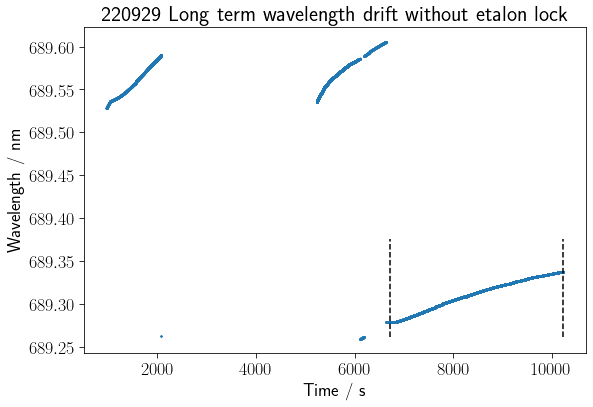

In [261]:
## Plot out

df.plot("time / s",
        "wavelength / nm",
        kind='scatter',
        s=1,
        figsize=(9,6),
        xlabel='Time / s',
        ylabel='Wavelength / nm',
        title='220929 Long term wavelength drift without etalon lock')
plt.axvline(6707,0.05,0.35,c='k',ls='--')
plt.axvline(10221,0.05,0.35,c='k',ls='--')
# plt.show()
plt.savefig('220929 Long term wavelength drift without etalon lock'+'.pdf',bbox_inches='tight',dpi=300)

## Wavelength drift calculation

In [245]:
## Slicing the last diagonal blue line only

df.iloc[-38000:,:]

,time / s,wavelength / nm,a,b,c
20699,6707.392053,689.278400,NaN,NaN,NaN
20700,6707.630123,689.278401,NaN,NaN,NaN
20701,6707.868382,689.278401,NaN,NaN,NaN
20702,6708.106258,689.278401,NaN,NaN,NaN
20703,6708.344504,689.278401,NaN,NaN,NaN
...,...,...,...,...,...
58694,10221.043223,689.336897,NaN,NaN,NaN
58695,10221.129342,689.336897,NaN,NaN,NaN
58696,10221.215246,689.336897,NaN,NaN,NaN
58697,10221.301295,689.336897,NaN,NaN,NaN


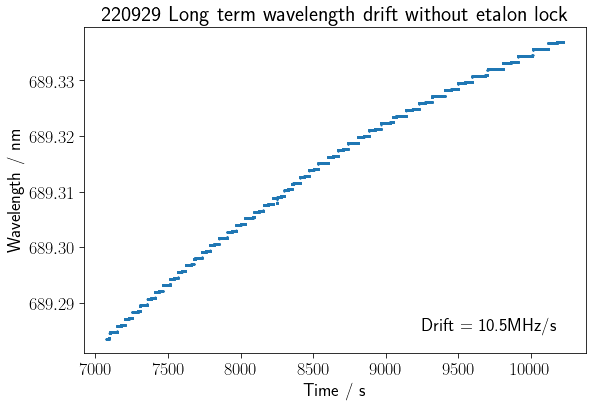

In [259]:
## Plot out sliced selected region

df.iloc[20699:58698].plot("time / s",
        "wavelength / nm",
        kind='scatter',
        s=1,
        figsize=(9,6),
        xlabel='Time / s',
        ylabel='Wavelength / nm',
        title='220929 Long term wavelength drift without etalon lock')
# plt.show()
plt.annotate('Drift = 10.5MHz/s',xy=(9250,689.285))
plt.savefig('220929 Long term wavelength drift without etalon lock (sliced)'+'.pdf',bbox_inches='tight',dpi=300)

In [248]:
drift_rate = (f1-f2)/(t2-t1)/1e6 #MHz/s
drift_rate  #MHz/s

10.503230291654928